In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from rich.progress import track

sns.set(color_codes=True, style="white")

### Load Data

In [16]:
folder = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/paper_figure_plots/post_bioRxiv_Figs/FLIM-FCS-replot"
os.chdir(folder)
df = pd.read_excel("fitResults_20231110a.xls")
df.keys()

Index(['folder', 'filename', 'channel', 'position', 'G0', 'tauD',
       'chi squared (FCS)', 'lifetime (one comp)',
       'chi squared(lifetime, one comp)', 'lifetime (comp 1 of 2)',
       'lifetime (comp 2 of 2)', 'amp (comp 1 of 2)', 'amp (comp 2 of 2)',
       'chi squared(lifetime, two comp)'],
      dtype='object')

### Function

In [6]:
def diff(size, tauD):
    # size um, tauD s
    return size**2 / (4 * tauD)

### Plot

In [18]:
d = df[
    (df["folder"] == "D:\\tempData\\gmgao\\20231010\\exp")
    | (df["folder"] == "D:\\tempData\\gmgao\\20231017")
]
d = d[d["channel"] == 1]
d = d[(d["tauD"] < 0.5) & (d["tauD"] > 0.001)]
d = d[d["lifetime (one comp)"] > 2.8]
d["D"] = diff(0.1, d["tauD"].to_numpy(float))
d["log10D"] = np.log10(diff(0.1, d["tauD"].to_numpy(float)))
d.keys()

Index(['folder', 'filename', 'channel', 'position', 'G0', 'tauD',
       'chi squared (FCS)', 'lifetime (one comp)',
       'chi squared(lifetime, one comp)', 'lifetime (comp 1 of 2)',
       'lifetime (comp 2 of 2)', 'amp (comp 1 of 2)', 'amp (comp 2 of 2)',
       'chi squared(lifetime, two comp)', 'D', 'log10D'],
      dtype='object')

<Figure size 300x300 with 0 Axes>

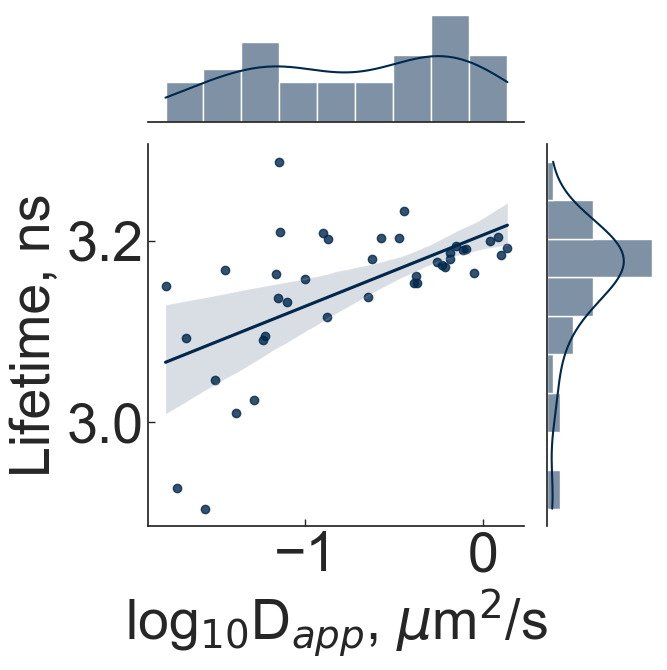

In [25]:
fontsize = 40
plt.figure(figsize=(3, 3))
sns.jointplot(
    data=d,
    x="log10D",
    y="lifetime (one comp)",
    kind="reg",
    color="#00274c",
    ratio=3,
    marginal_kws=dict(bins=9),
)
plt.xlabel("log$_{10}$D$_{app}$, $\mu$m$^2$/s", fontsize=fontsize)
plt.ylabel("Lifetime, ns", fontsize=fontsize)
# plt.xlim(0, 0.12)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig("fcs-flim-FUS.png", format="png", dpi=300, bbox_inches="tight")